<a href="https://colab.research.google.com/github/edwardoughton/spatial_computing/blob/main/7_01_Scripting_Spatial_Processing_via_GeoPandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scripting spatial processing via GeoPandas

Welcome back after Spring Break to GGS366 Spatial Computing.

Today's work will cover the second week we focus on scripting in `Python`, using `GeoPandas` to undertake spatial computing tasks.

Please do recap the syllabus to familiarize yourself of where we have come from, and where we intend to go in the remaining weeks. We will cover a summary now.  

As a reminder, this week Assignment 4 will be set.

## GGS366 learning objectives

The key learning objectives of this class include:

1. Understanding the basics of computer programming (e.g., variables, functions, iteration etc.), as well as different design approaches (scripting versus object-oriented), with relevance to the spatial sciences.
2. Developing critical thinking skills with regard to spatial computing uses, design approaches, and methodological choices.
3. Mastering important programming applications (e.g., Google Colab) and key spatial computing packages (e.g., shapely, geopandas etc.).

## Recapping GGS366

We have covered a number of key spatial computing aspects, including:



1.   A strong introduction to native programming in `Python`, including data
types, variables, data structures (introductory and advanced), file operations (input, output) etc.
2.   Coverage of advanced concepts, including looping, control statements, user-defined functions etc.
3.   Experience working with some of the main computational science and spatial computing packages and libraries, from `Pandas` through to `Shapely` and `GeoPandas`.
4.   A thorough understanding of how to access and utilize Google Colab notebooks as a code development platform.
5.   Emphasis on how to adhere to best-practice programming, including PEP8, through to mitigating the risk of getting the wrong answer when coding.
6.   Development of critical thinking skills, especially when working on assignments.

Any other comments? What do you think? Feedback is very much welcome and encouraged!


## Set operations in `GeoPandas`

Today we will introduce set operations in `GeoPandas`. This is the ability to manipulate larger numbers of geometries at once, using only a few lines of code. This is largely thanks to utilizing `GeoPandas` `GeoDataFrame` capabilities.





## GeoPandas Series

A `GeoPandas` `Series` is a one-dimensional labeled array that is part of the `GeoPandas` library, an extension of the popular `Pandas` library for working with geospatial data.

The `GeoPandas` `Series` can hold various types of data, including geometry data types for handling spatial information (points, lines, polygons, etc.).

We can typically create such as structure as follows, using the `.GeoSeries()` function.

In [2]:
# Example: Creating a GeoPandas Series with Point geometries
import geopandas as gpd
from shapely.geometry import Point

# Creating a GeoPandas Series
points = gpd.GeoSeries([Point(0, 0), Point(1, 1), Point(2, 2)])

## GeoPandas GeoDataFrame

You may recall from our previous classes that a `GeoPandas` `GeoDataFrame` is a two-dimensional data structure (e.g., a matrix). The `GeoDataFrame` extends the `Pandas` `DataFrame`, by including a `GeoPandas` `Series` as one of its columns, e.g., the geometry column.

Spatial information for each row in the `GeoDataFrame` is stored in this geometry column. See the example below to remind yourself.

In [3]:
# Example: Creating a GeoPandas GeoDataFrame with Point geometries
import geopandas as gpd
from shapely.geometry import Point

# Here we specify a dictionary structure, and then convert to GeoDataFrame
# The dict key will be the column name
# The list of values the row information
data = {
    'Name': ['Location A', 'Location B', 'Location C'],
    'Type': ['Type D', 'Type F', 'Type X'],
    'geometry': [Point(2, 3), Point(4, 5), Point(0, 9)]
    }
gdf = gpd.GeoDataFrame(data)

# Inspect our GeoDataFrame
gdf

,Name,Type,geometry
0,Location A,Type D,POINT (2.00000 3.00000)
1,Location B,Type F,POINT (4.00000 5.00000)
2,Location C,Type X,POINT (0.00000 9.00000)


## Loading in spatial datasets and utilizing set operations

In this example, we will:



1.   Load in two spatial datasets, one consisting of boundaries, and one consisting of buildings.
2.   We will explore intersecting, as well as taking the symmetric difference, and difference.

Let us begin by loading in our data.

Make sure you download `kasunga.zip` from the MyMason GGS366 page. Unzip and inspect.







In [4]:
# Example: Loading data from a local machine
from google.colab import files
uploaded = files.upload()

Saving kasungu_buildings.dbf to kasungu_buildings.dbf
Saving kasungu_buildings.prj to kasungu_buildings.prj
Saving kasungu_buildings.shp to kasungu_buildings.shp
Saving kasungu_buildings.shx to kasungu_buildings.shx
Saving kasungu_gadm3_regions.cpg to kasungu_gadm3_regions.cpg
Saving kasungu_gadm3_regions.dbf to kasungu_gadm3_regions.dbf
Saving kasungu_gadm3_regions.prj to kasungu_gadm3_regions.prj
Saving kasungu_gadm3_regions.qmd to kasungu_gadm3_regions.qmd
Saving kasungu_gadm3_regions.shp to kasungu_gadm3_regions.shp
Saving kasungu_gadm3_regions.shx to kasungu_gadm3_regions.shx


We can load in our boundary information for the Kasungu region of Malawi, utilizing the `.read_file()` function.

Our boundaries consist of four GADM level 3 regions. Please inspect these in your associated GIS software to understand the geographic context.

We take this data from GADM: https://gadm.org/

In [5]:
# Example: Importing spatial data
import geopandas as gpd

# As we know the crs here, we will specify it on import
boundaries = gpd.read_file('kasungu_gadm3_regions.shp', crs='epsg:4326')

# Example: Viewing our geodataframe
boundaries

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,MWI,Malawi,MWI.9_1,Kasungu,None,MWI.9.1_1,Kasungu Boma,None,MWI.9.1.2_1,n.a. (467),None,None,Unknown,Unknown,None,None,"POLYGON ((33.48986 -13.03852, 33.48930 -13.038..."
1,MWI,Malawi,MWI.9_1,Kasungu,None,MWI.9.1_1,Kasungu Boma,None,MWI.9.1.4_1,n.a. (473),None,None,Unknown,Unknown,None,None,"POLYGON ((33.50063 -13.02587, 33.50069 -13.025..."
2,MWI,Malawi,MWI.9_1,Kasungu,None,MWI.9.1_1,Kasungu Boma,None,MWI.9.1.6_1,n.a. (476),None,None,Unknown,Unknown,None,None,"POLYGON ((33.48590 -13.03370, 33.48648 -13.033..."
3,MWI,Malawi,MWI.9_1,Kasungu,None,MWI.9.1_1,Kasungu Boma,None,MWI.9.1.7_1,n.a. (477),None,None,Unknown,Unknown,None,None,"POLYGON ((33.48986 -13.03852, 33.49029 -13.038..."


We can utilize the `.plot()` function to visualize these geometries.

The sample below shows this graphically.

<Axes: >

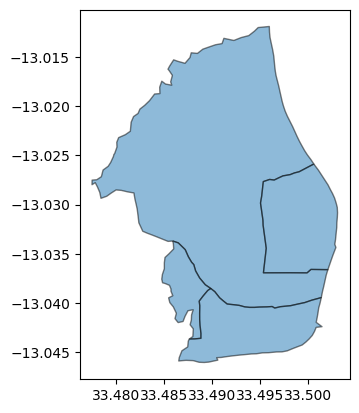

In [6]:
# Example: Plotting our boundary geometries
boundaries.plot(alpha=0.5, edgecolor='k')

This boundary data suggests we have 4 regions within Kasungu Boma.

We can access the geographic identifier string IDs as follows.

In [7]:
# Example: Printing the GID_3 column
print(boundaries['GID_3'])

0    MWI.9.1.2_1
1    MWI.9.1.4_1
2    MWI.9.1.6_1
3    MWI.9.1.7_1
Name: GID_3, dtype: object


Next, we can load some sample building footprint data to explore.

We take this data from OpenStreetMap, downloaded via the GeoFabrik download server: https://download.geofabrik.de/

In [8]:
# Example: Importing spatial data
import geopandas as gpd

# As we know the crs here, we will specify it on import
buildings = gpd.read_file('kasungu_buildings.shp', crs='epsg:4326')

# Example: Viewing our geodataframe
buildings.head(3)

,osm_id,code,fclass,name,type,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,...,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,452791523,1500,building,None,None,MWI,Malawi,MWI.9_1,Kasungu,None,...,None,MWI.9.1.2_1,n.a. (467),None,None,Unknown,Unknown,None,None,"POLYGON ((33.49364 -13.03481, 33.49372 -13.034..."
1,452791524,1500,building,None,None,MWI,Malawi,MWI.9_1,Kasungu,None,...,None,MWI.9.1.2_1,n.a. (467),None,None,Unknown,Unknown,None,None,"POLYGON ((33.49395 -13.03482, 33.49416 -13.034..."
2,452791525,1500,building,None,None,MWI,Malawi,MWI.9_1,Kasungu,None,...,None,MWI.9.1.2_1,n.a. (467),None,None,Unknown,Unknown,None,None,"POLYGON ((33.49414 -13.03450, 33.49414 -13.034..."


Next, we can plot our building geometries.

We have over 7,000 bounding outlines for Kasungu, Malawi.

7099


<Axes: >

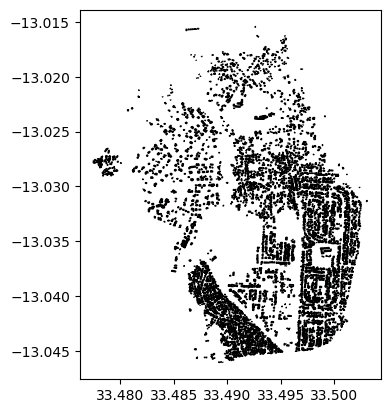

In [9]:
# Example: Plotting building geometries
print(len(buildings))
buildings.plot(edgecolor='k')

## Intersecting

In this example, we will intersect data with various spatial boundaries to subset the building footprints for different regions.

When intersecting, `GeoPandas` returns only those geometries that are contained by both GeoDataFrames.

First, we want to create a `GeoDataFrame` with only the boundaries we want to use for our intersection.

We can begn with "MWI.9.1.6_1".

<Axes: >

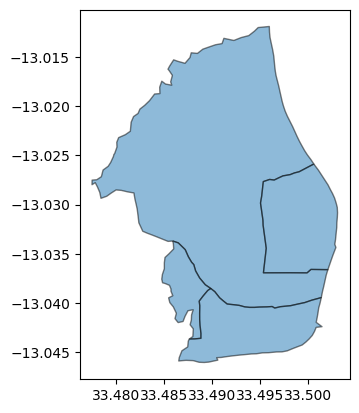

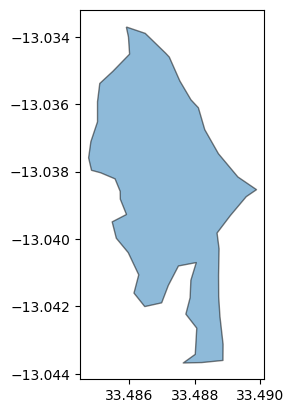

In [10]:
# Example: Obtaining a single region boundary
boundary = boundaries[boundaries['GID_3'] == "MWI.9.1.6_1"]
boundaries.plot(alpha=0.5, edgecolor='k') #original df
boundary.plot(alpha=0.5, edgecolor='k') #new df

Next, we can carry out the actual intersection.

Here, we are following the `GeoPandas` documentation page on set operations: https://geopandas.org/en/stable/docs/user_guide/set_operations.html

In this case, we will utilize the `.overlay()` function and specify "intersection".

Inspect and understand the difference below once this intersection has been carried out.  


594


<Axes: >

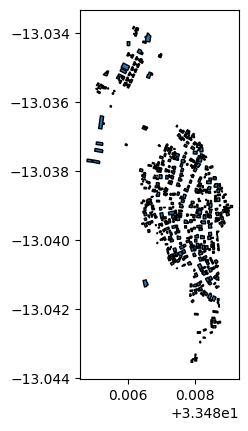

In [11]:
# Example: Intersecting building boundaries for a region of interest
buildings_subset = buildings.overlay(boundary, how='intersection')
print(len(buildings_subset))
buildings_subset.plot(edgecolor='k')

# Task

Now carry out an intersection for two of the four sub-regions of Kasungu, Malawi. You will need to:



*   Subset your boundaries.
*   Intersect your building outlines.
*   Print the number of buildings in the original and new df.
*   Export your subset to `.shp` and view in a piece of GIS software.



## Symmetric Difference and Difference

Symmetric difference produces the opposite of the intersection, so it only returns geometries which are part of one of the GeoDataFrames.





/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:2451: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


5258


<Axes: >

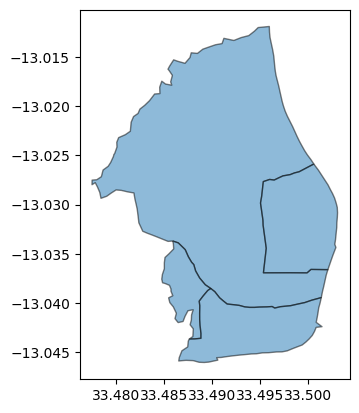

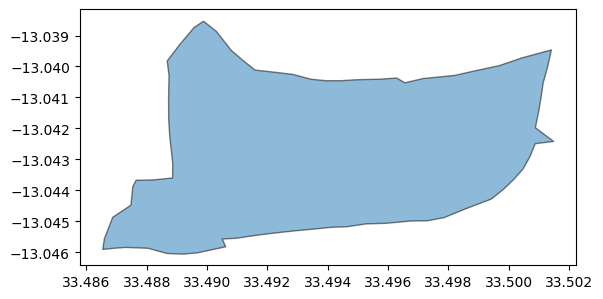

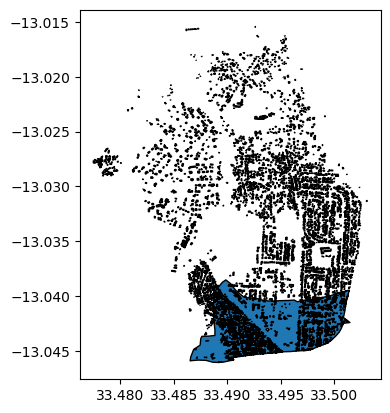

In [12]:
# Example: Symmetric Difference of building boundaries for a region of interest
boundary = boundaries[boundaries['GID_3'] == "MWI.9.1.7_1"]
boundaries.plot(alpha=0.5, edgecolor='k') #original df
boundary.plot(alpha=0.5, edgecolor='k') #new df

buildings_subset = buildings.overlay(boundary, how='symmetric_difference')
print(len(buildings_subset))
buildings_subset.plot(edgecolor='k')

In contrast, when using `difference`, we obtain only those geometries which are part of one GeoDataFrame, and not part of the other.

Here we obtain all buildings which do not intersect with our chosen region of interest.

5257


<Axes: >

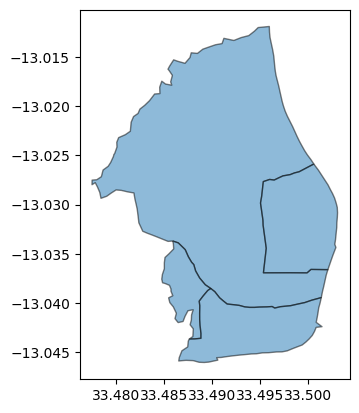

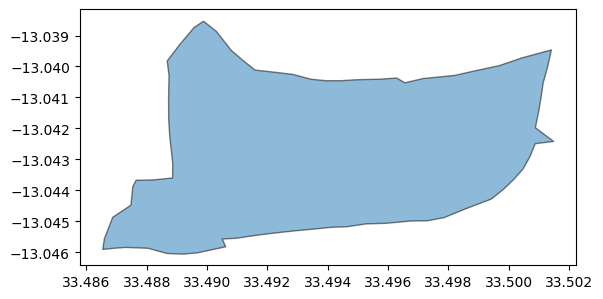

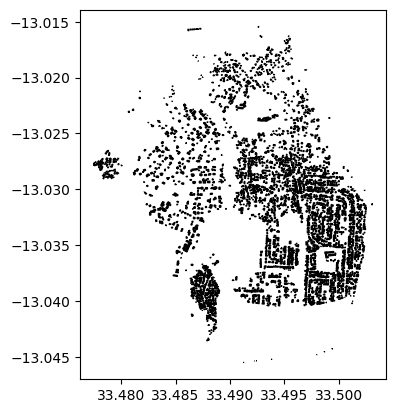

In [13]:
# Example: Difference of building boundaries for a region of interest
boundary = boundaries[boundaries['GID_3'] == "MWI.9.1.7_1"]
boundaries.plot(alpha=0.5, edgecolor='k') #original df
boundary.plot(alpha=0.5, edgecolor='k') #new df

buildings_subset = buildings.overlay(boundary, how='difference')
print(len(buildings_subset))
buildings_subset.plot(edgecolor='k')

Task

OpenStreetMap has a wealth of spatial data which we can apply to spatial computing tasks. We will want to utilize this resource to help us to develop a script which subsets key datasets of interest for a capital region.

1.   Select a small country (e.g., so you can easily download and intersect the available data). Think Rwanda, Liechtenstein, Tuvalu, Malta, Monaco etc.
2.   Download OSM data from the GeoFabrik server (.shp may be easiest).
3.   Download the associated boundaries from GADM for your selected country (.shp may be easiest).
4.   Subset a boundary shape for the capital city region.
5.   Write code to intersect and export the road and rail network, and Points of Interest (PoIs).




Task

Should you manage to complete the previous task, you should attempt the following:


1.   Load in the building dataset for your chosen country.
2.   Try to estimate the ground-floor building area in square meters.
3.   Consider different scenarios for estimating the total building floorspace where the mean building height is 2, 3, or 4 floors high.

We have covered the steps for this in a previous class, where we took the geometry area of a chosen polygon or set of polygons. You need to work out how to implement this within the example.  
